Pour démarer la présentation : `jupyter nbconvert --config=Configuration.py Presentation.ipynb`

# Validation croisée ✅

Présenté par Alix ANNERAUD et Hugo TONDENIER.

# 1. Principe 🔍

Qu'est-ce que la validation croisée et pourquoi est-elle utile ?

## 🤖 Réponse de ChatGPT 4o

La vérification croisée, aussi connue sous le nom de validation croisée, est une technique utilisée en machine learning pour évaluer la performance d'un modèle. L'objectif principal est de vérifier comment les résultats d'un modèle généré à partir d'un jeu de données donné vont généraliser sur un jeu de données indépendant. Voici comment cela fonctionne en général :

### Processus de Validation Croisée :

1. **Division des Données** :
   Le jeu de données initial est divisé en plusieurs sous-ensembles ou "folds". Une division courante est la validation croisée k-fold, où les données sont divisées en k sous-ensembles.

2. **Entraînement et Validation** :
   Pour chaque itération, un des k sous-ensembles est utilisé comme jeu de validation, et les k-1 autres sous-ensembles sont utilisés comme jeu d'entraînement. Ce processus est répété k fois, chaque sous-ensemble servant exactement une fois de jeu de validation.

3. **Évaluation** :
   À chaque itération, le modèle est évalué sur le jeu de validation et les performances (par exemple, précision, rappel, F1-score) sont enregistrées.

4. **Agrégation des Résultats** :
   Après k itérations, les résultats des k évaluations sont agrégés pour donner une estimation globale de la performance du modèle. Cela peut être fait en calculant la moyenne des performances des k itérations.

### Avantages de la Validation Croisée :

- **Réduction de l'Overfitting** :
  En utilisant différents sous-ensembles pour l'entraînement et la validation, la validation croisée aide à réduire le risque de surapprentissage (overfitting) sur un jeu de données spécifique.
  
- **Utilisation Optimale des Données** :
  Toutes les données sont utilisées à la fois pour l'entraînement et pour la validation, ce qui est particulièrement avantageux lorsque le jeu de données est petit.

### Types de Validation Croisée :

- **k-fold Cross-Validation** :
  Le jeu de données est divisé en k sous-ensembles de taille égale. C'est la méthode la plus couramment utilisée.

- **Leave-One-Out Cross-Validation (LOOCV)** :
  Une forme extrême de k-fold où k est égal au nombre de données dans le jeu de données (chaque donnée est utilisée une fois pour la validation, et toutes les autres pour l'entraînement).

- **Stratified k-fold Cross-Validation** :
  Une version de la validation croisée k-fold où chaque fold contient environ la même proportion des différentes classes de la variable cible, ce qui est particulièrement utile pour les jeux de données déséquilibrés.

- **Repeated k-fold Cross-Validation** :
  Une variation où la validation croisée k-fold est répétée plusieurs fois, avec des divisions différentes à chaque répétition, et les résultats sont moyennés.

### Exemple Pratique :

Supposons que nous ayons un jeu de données avec 100 observations. Si nous effectuons une validation croisée 5-fold :

1. Diviser les 100 observations en 5 sous-ensembles de 20 observations chacun.
2. Entraîner le modèle sur 80 observations et le tester sur les 20 restantes, répéter ce processus 5 fois en changeant à chaque fois le jeu de validation.
3. Calculer la performance moyenne des 5 évaluations.

### Conclusion :

La validation croisée est un outil essentiel pour obtenir une évaluation robuste et fiable de la performance d'un modèle de machine learning, en s'assurant qu'il généralise bien à des données non vues.

## 🏃 Entraînement d'un modèle

```mermaid
flowchart TB


subgraph Modèle
    direction TB

    Modele[Modèle] --> Entrainement[Entraînement]
    Entrainement --> ModeleEntraine[Modèle entraîné]
    ModeleEntraine --> ValidationCroisee[Validation croisée] 
    ValidationCroisee --> ModeleOptimal[Modèle optimal]

    ValidationCroisee --> Entrainement

    ModeleOptimal --> Evaluation[Evaluation]

  

        Jeu[Jeu de données]
        JeuApprentissage[Jeu d'apprentissage]
        JeuTest[Jeu de test]
        JeuValidation[Jeu de validation]

        Jeu --> JeuApprentissage[Jeu d'apprentissage]
        Jeu --> JeuTest[Jeu de test]
        Jeu --> JeuValidation[Jeu de validation]
  
    JeuApprentissage --> Entrainement
    JeuValidation --> ValidationCroisee
    JeuTest --> Evaluation

end


```

### ➗ Division des données
Constitution des jeux de données

Diviser le jeu de données en 3 parties : apprentissage, validation et test.

#### K-Fold

On divise le jeu de données en $K$ sous-ensembles.
1. **Entraînement** : sur $K-1$ sous-ensembles
2. **Test** : le sous-ensemble restant.

On répète l'opération $K$ fois en changeant le sous-ensemble de test à chaque fois.

#### Shuffle split

On divise le jeu de données en $n$ sous-ensembles.

1. **Entraînement** : sur $n-1$ sous-ensembles
2. **Test** : le sous-ensemble restant.

On répète l'opération $n$ fois.


# 2. Exemple 👀

## 📥 Chargement des données

In [1]:
from sklearn import datasets, metrics, svm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

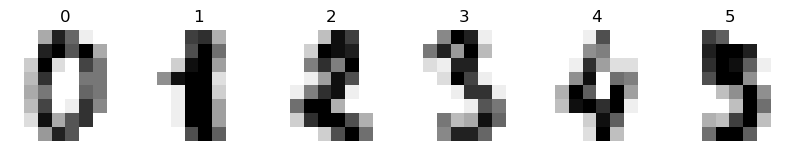

In [2]:
chiffres = datasets.load_digits()   # Importation du jeu de données

# Affichage des 6 premières images
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(10, 5))
for ax, image, label in zip(axes, chiffres.images, chiffres.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title("%i" % label)

## 📊 Préparation des données

In [3]:
# "Aplatissement" des images (2D) en vecteurs de caractéristiques (1D)
n_samples = len(chiffres.images)
data = chiffres.images.reshape((n_samples, -1))

# Division en ensembles d'entraînement et de test
X_entrainement, X_test, y_entrainement, y_test = train_test_split(data, chiffres.target, test_size=0.3, shuffle=False)


## 📈 Regression logistique
montrer le réglage de l'hyperparamètre max_iter 30 est mieux que 1000 pour le train set et le test set définis ici  
remonter un mettre shuffle = True dans le test split  
agrandir réduire la taille du test set pour avoir plus de donnée d'entrainement 

In [5]:
# - Création et entraînement du modèle
clf = LogisticRegression(max_iter=1000) # max_iter est l'hyperparamètre que l'on veut régler
clf.fit(X_entrainement, y_entrainement)

# Prédiction du model sur le jeu de test
prediction = clf.predict(X_test)

# Calcul de la précision du modèle
precision = accuracy_score(y_test, prediction)
print("Précision: {:.2f}%".format(precision * 100))

Précision: 92.04%


/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


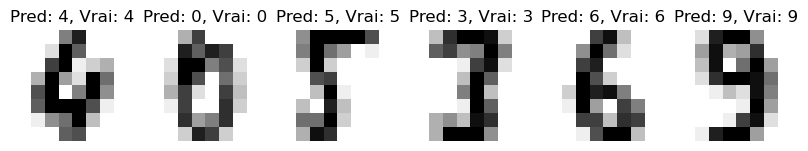

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(10, 5))
for ax, image, prediction, true_label in zip(axes, X_test.reshape(-1, 8, 8), prediction, y_test):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Pred: {prediction}, Vrai: {true_label}')

In [ ]:
# - Création et entraînement du modèle
clf = LogisticRegression(max_iter=30) # max_iter est l'hyperparamètre que l'on veut régler
clf.fit(X_train, y_train)

# Prédiction du model sur le jeu de test
prediction = clf.predict(X_test)

# Calcul de la précision du modèle
precision = accuracy_score(y_test, prediction)
print("Précision: {:.2f}%".format(precision * 100))

Précision: 91.85%


/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Intervention de la Validation Croisée

In [ ]:

# Validation croisée de l'accuracy
accuracy_scores = cross_val_score(clf, data, chiffres.target, cv=5, scoring='accuracy')

print("Scores de précision pour chaque fold: ", accuracy_scores)
print("Moyenne: {:.2f}%".format(accuracy_scores.mean() * 100))

/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

Scores de précision pour chaque fold:  [0.91388889 0.86944444 0.93871866 0.93314763 0.91086351]
Moyenne: 91.32%


/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Cas concret de recherche des paramètre avec un SVC  
la fonction gridsearchCV calcule des scores en utilisant la validation croisé pour une matrice de paramètres 

In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],  # Plus C est élevé, plus la régularisation est faible
    'gamma': [0.001, 0.01, 0.1, 1],  # Plus gamma est élevé, plus le modèle est complexe
    'kernel': ['rbf', 'poly', 'sigmoid']  # Types de noyaux à tester
}

# Création du modèle SVM avec GridSearchCV
svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=1)

In [ ]:
# Affichage des meilleurs paramètres
print("Best parameters found: ", grid_search.best_params_)
best_svm = grid_search.best_estimator_

# Prédiction et évaluation sur l'ensemble de test
predictions = best_svm.predict(X_test)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, predictions) * 100))

Best parameters found:  {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
Accuracy: 97.04%


# Merci de votre attention 👏